# Assignment 3 Task 2-BPNN
In this example, I will use PyTorch to train Neural Network detecting hand written digit similar to the lab. Howver we will use EMNIST (Extended-MNIST) datasets on this occasion.  

I will be importing the package "torch" in order to use `PyTorch` and `heading.py` created by Helen;

*There is small changes in `heading.py` to load EMNIST datasets

In [1]:
from heading import *
import torch

### THE EMNIST  (Extended MNIST) Datasets

EMNIST contain six different splits provided in this dataset. ByClass, ByMerge, Balanced, Letters, Digits, MNIST. EMNIST MNIST: 70,000 characters. 10 balanced classes. It is a subset of a larger set available from NIST. The images are grey scale, 28x28 pixels. EMNIST dataset structure that directly matches the MNIST dataset

### 1. Self-defined Back Propagation Neural Network (BPNN)

In this part we create a self-defined BPNN class with the following structural parameters:
 
#### Four fully connected layers: FC_layer_1,  FC_layer_2, FC_layer_3 and FC_layer_4
 * FC_layer_1 
  * Input nodes: 784, 
  * Output nodes: 400, 
  * Activation function: ReLU()
  
 Example: `nn.Sequential(nn.Linear(784, 400), nn.ReLU())`
 
  
 * FC_layer_2
  * Input nodes: 400, 
  * Output nodes: 200, 
  * Activation function: ReLU()
  
 * FC_layer_3
  * input nodes: 200,
  * output nodes: 100,
  * Activation function: ReLU()
  
 * FC_layer_4
  * input nodes: 100,
  * output nodes: 10,
  
#### Output
  * output nodes: 10 for 10 classes with each class representing one digit.

Here we define the BPNN class with the structural parameters above. (Provided by Helen)

In [2]:
class BPNN_net(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Sequential(nn.Linear(784, 400), nn.ReLU())
        self.layer2 = nn.Sequential(nn.Linear(400, 200), nn.ReLU())
        self.layer3 = nn.Sequential(nn.Linear(200, 100), nn.ReLU())
        self.layer4 = nn.Sequential(nn.Linear(100, 10))

    def forward(self, x):
        x = x.view(-1,784)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        return x

we will create BPNN network using `create_network(network)`.

In [3]:
BPNN = BPNN_net()
net_work = create_network(BPNN)

### Load MNIST datasets

define the input image size, the default size is 28. 

In [4]:
image_size = 28

resize the image shape to fit different networks.

In [5]:
transform = resize_image(image_size)

Divide the dataset into BATCH_SIZE equal parts for training.

In [6]:
BATCH_SIZE = 64

Load the train data and test data separately by `load_EMNIST_data(transform, batch size, train or not, folder path = 'Data')` method. 

For training data, we need to set the train argument is True. 
For testing data, we need to set the train argument is False. 

*`load_EMNIST_data` function is created by me

In [7]:
train_loader = load_EMNIST_data(transform, BATCH_SIZE, train= True, PATH='Data')
test_loader = load_EMNIST_data(transform, BATCH_SIZE ,train= False, PATH= 'Data')

### Train Model

Here we need set the epoch and learning rate.

In [8]:
EPOCH = 1
LR = 0.001

Then, we can use `train_model(Network, train loader, learning rate, number of epoch)` to train the model. 

In [9]:
trained_model = train_model(net_work, train_loader, LR, EPOCH)

[1,100] loss:0.754
[1,200] loss:0.288
[1,300] loss:0.218
[1,400] loss:0.185
[1,500] loss:0.170
[1,600] loss:0.152
[1,700] loss:0.130
[1,800] loss:0.121
[1,900] loss:0.120


### Test Model

We can use `test_model(trained model, test loader)`.

In [10]:
test_model(trained_model, test_loader)

correct1:  tensor(9661)
Test acc: 0.9661


### Save Model

To save this model, we can use the :
`torch.save(trained_model, './my_model.pth')`

In [11]:
model = trained_model
image_size = 28
num_of_prediction = 20

To see how does it work we can use this code :

`predict_image(trained model, image size, number of prediction)`. 

[7 0 6 6 7 9 9 8 9 8 7 6 7 3 5 7 0 4 9 0]
The predict result is [7 0 6 6 7 9 9 8 9 8 7 6 2 3 5 7 0 4 9 0]


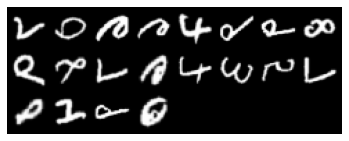

In [12]:
predict_image(model, image_size, num_of_prediction)